# Project - Car Purchase Amount Predictions Using ANNs ( Regression Task)

# Problem Statement
You are working as a car salesman and you would like to develop a model to predict the total amount that customers are willing to pay given the following attributes:
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary
- Credit Card Debt
- Net Worth

The Model should predict:
- Car Purchase Amount

# What is Regression?
- Regression works by predicting value of one variable Y basd on another variable X.
- X is called the independent variable and Y is called the dependant variable.

Goal is to obtain a relationship(model) between the Annual salary and car purchasing amount.

y = b + m * x

y - Dependant variable (Car purchasing amount)

x - Independant variable (Annual Salary)

b, m - model
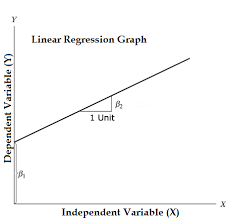

# Artificial Neural Network
- The brain has over 100 billion neurons communicating through electrical and chemical signals.
- Neurons communicate with each other and help us see, think and generate ideas.
- Human brain learns by creating connections among these neurons.
- ANNs are information processing models inspired by the human brain.

# Network Training: Back Propagation
- Backpropagation is a method used to train ANNs by gradient needed to update network weights.
- It is commonly used by the gradient descent optimization algorithm to adjust the weight of neurons by calculating the gradient of the loss funtion.

     

# LIBRARIES IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET

In [3]:
car_df=pd.read_csv('car_purchasing.csv', encoding = 'ISO-8859-1')

In [9]:
car_df.head(5)

customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

# VISUALIZE DATASET

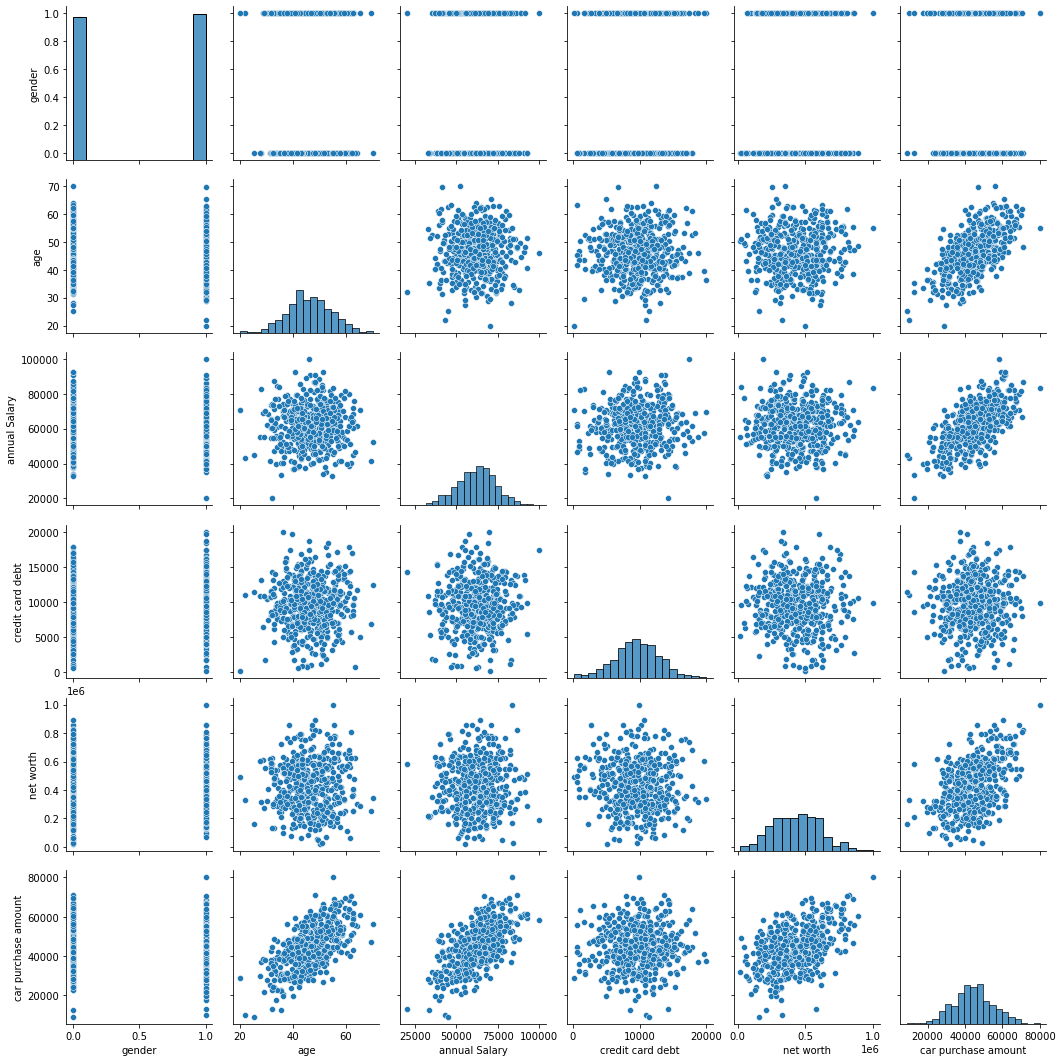

In [10]:
sns.pairplot(car_df)

In [15]:
X = car_df.drop(['country', 'customer e-mail', 'customer name','car purchase amount'], axis=1)

In [16]:
X

gender        age  annual Salary  credit card debt    net worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]

In [20]:
y=car_df['car purchase amount']

In [21]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [26]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [27]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [33]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [50]:
X_scaled.shape

(500, 5)

# TRAINING THE MODEL

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
model=Sequential()
model.add(Dense(50, input_dim = 5, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                300       
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [76]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0084 - val_loss: 0.0053
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: 0.0052
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.0045
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0036
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0034
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 11/100
6/6 [=========

Epoch 80/100
6/6 [==============================] - 0s 7ms/step - loss: 3.0792e-05 - val_loss: 3.0315e-05
Epoch 81/100
6/6 [==============================] - 0s 7ms/step - loss: 3.0307e-05 - val_loss: 2.8786e-05
Epoch 82/100
6/6 [==============================] - 0s 6ms/step - loss: 3.0090e-05 - val_loss: 2.9529e-05
Epoch 83/100
6/6 [==============================] - 0s 6ms/step - loss: 2.9067e-05 - val_loss: 3.0469e-05
Epoch 84/100
6/6 [==============================] - 0s 6ms/step - loss: 3.0038e-05 - val_loss: 2.8598e-05
Epoch 85/100
6/6 [==============================] - 0s 7ms/step - loss: 2.9716e-05 - val_loss: 2.9960e-05
Epoch 86/100
6/6 [==============================] - 0s 7ms/step - loss: 2.8195e-05 - val_loss: 2.6459e-05
Epoch 87/100
6/6 [==============================] - 0s 6ms/step - loss: 2.7471e-05 - val_loss: 2.3587e-05
Epoch 88/100
6/6 [==============================] - 0s 6ms/step - loss: 2.5767e-05 - val_loss: 2.3843e-05
Epoch 89/100
6/6 [============================

# EVALUATING THE MODEL

In [77]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

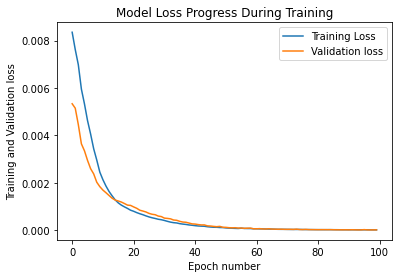

In [78]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss','Validation loss'])

In [79]:
# Gender, Age, Annual Salary, Credit card Debt, Net worth
X_test = np.array([[1, 50, 50000, 10000, 600000]])
y_predict = model.predict(X_test)

1/1 [==============================] - 0s 118ms/step


In [81]:
print('Expected Purchase Amount ', y_predict)

Expected Purchase Amount  [[117603.734]]


Importing Required Modules
python
Copy code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential: This line imports the Sequential class from TensorFlow's Keras API. Sequential is a type of model in Keras where layers are added sequentially (one after another). This is suitable for most deep learning tasks where you can stack layers linearly.

from tensorflow.keras.layers import Dense: This line imports the Dense layer, which is a fully connected layer in a neural network. Each neuron in a Dense layer receives input from all the neurons in the previous layer. The Dense layer is one of the most common types of layers in a neural network.

Creating the Model
python
Copy code
model = Sequential()
model = Sequential(): This initializes a new Sequential model. At this point, the model is empty, and layers will be added to it sequentially.
Adding Layers to the Model
python
Copy code
model.add(Dense(40, input_dim=5, activation='relu'))
model.add(Dense(40, input_dim=5, activation='relu')): This adds the first layer to the model:
Dense(40, ... ): Specifies that this layer will have 40 neurons.
input_dim=5: Indicates that the input to the model has 5 features (or dimensions). This is only required for the first layer in the model so that Keras knows what the input shape looks like.
activation='relu': Specifies the activation function for this layer. ReLU (Rectified Linear Unit) is a popular activation function that introduces non-linearity by setting all negative inputs to zero and keeping positive values unchanged.
python
Copy code
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu')): This adds a second Dense layer to the model with 40 neurons and a ReLU activation function. Since this is not the first layer, the input dimension is inferred from the previous layer, so there's no need to specify input_dim.
python
Copy code
model.add(Dense(1, activation='linear'))
model.add(Dense(1, activation='linear')): This adds the output layer with a single neuron:
Dense(1, ... ): Specifies that the output of this model will be a single value (useful for regression tasks).
activation='linear': The activation function is linear, meaning no transformation is applied to the output. This is typical for regression tasks, where you want the output to be a continuous value.
Compiling the Model
python
Copy code
model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(optimizer='adam', loss='mean_squared_error'): This configures the learning process of the model:
optimizer='adam': Specifies that the Adam optimizer will be used. Adam is an efficient stochastic gradient descent algorithm that adjusts the learning rate adaptively based on the first and second moments of the gradient.
loss='mean_squared_error': Specifies the loss function to be minimized. Mean Squared Error (MSE) is a common loss function for regression tasks, where the goal is to minimize the average squared difference between predicted and actual values.
Training the Model
python
Copy code
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)
epochs_hist = model.fit(X_train, y_train, ...): This trains the model on the training data:
X_train and y_train: X_train is the input data (features), and y_train is the target data (labels) that the model should learn to predict.
epochs=100: Specifies that the training process will run for 100 epochs. An epoch is one complete pass through the entire training dataset.
batch_size=50: The training data will be divided into batches of 50 samples each. The model weights will be updated after each batch.
verbose=1: Controls the verbosity of the output during training. verbose=1 means progress will be displayed as a progress bar.
validation_split=0.2: Specifies that 20% of the training data will be used for validation. The model will be evaluated on this validation data at the end of each epoch, allowing you to monitor its performance on unseen data.
Summary of What Happens:
The code defines a simple feedforward neural network with two hidden layers and one output layer.
It uses ReLU activation in the hidden layers and a linear activation in the output layer, suitable for regression tasks.
The model is trained using the Adam optimizer and mean squared error as the loss function.
The training data is split into batches, and the model is trained for 100 epochs while reserving 20% of the data for validation.
After the training process is complete, epochs_hist will contain the history of the training and validation loss for each epoch, which can be used to analyze the model's performance over time.
############################################################################

Sequential

Definition: Sequential is a class provided by Keras (a deep learning API in TensorFlow) that allows you to build neural networks layer by layer in a linear stack.
Explanation: When you create a Sequential model, you add layers to it sequentially, meaning each layer has exactly one input tensor and one output tensor. This structure is simple and is used when your model can be represented as a stack of layers.

2. ReLU (Rectified Linear Unit)
Definition: ReLU is an activation function used in neural networks, defined as f(x) = max(0, x).
Explanation: The ReLU function outputs the input directly if it's positive; otherwise, it outputs zero. It introduces non-linearity into the model, allowing the network to learn from errors and improve performance in complex tasks. It’s widely used because it helps in avoiding the vanishing gradient problem and speeds up the training process.

3. Activation Function
Definition: An activation function is a mathematical function applied to the output of a neuron in a neural network.
Explanation: The activation function determines if a neuron should be activated or not, based on its input. It adds non-linearity to the network, allowing it to model complex patterns. Common activation functions include ReLU, Sigmoid, Tanh, and Softmax.

4. Dense
Definition: Dense is a layer type in Keras that represents a fully connected layer in a neural network.
Explanation: In a Dense layer, each neuron receives input from every neuron in the previous layer. This type of layer is fundamental in neural networks and is used to connect layers densely. The number of neurons and the activation function are key parameters in defining a Dense layer.

5. Linear
Definition: Linear refers to an activation function where the output is directly proportional to the input, with no transformation (i.e., f(x) = x).
Explanation: In a neural network, a linear activation function is typically used in the output layer of a regression model where the goal is to predict continuous values. It allows the network to output a range of values directly.

6. Adam
Definition: Adam stands for Adaptive Moment Estimation, and it is an optimizer algorithm used in training neural networks.
Explanation: Adam combines the advantages of two other optimizers, AdaGrad and RMSProp. It computes adaptive learning rates for each parameter by maintaining a running average of both the gradients and the squared gradients. This helps in faster convergence and handles sparse gradients effectively, making it a popular choice for many deep learning tasks.

7. Optimizer
Definition: An optimizer is an algorithm used to update the weights of the neural network in order to minimize the loss function.
Explanation: During training, the optimizer adjusts the weights of the network based on the computed gradients. Different optimizers (like Adam, SGD, RMSProp) have different strategies for updating the weights, influencing how quickly and effectively the model learns.

8. Compile
Definition: compile is a method in Keras used to configure the learning process of a model.
Explanation: When you compile a model, you specify the optimizer, the loss function, and any metrics that the model should track during training. This step finalizes the model's learning configuration, making it ready for training.

9. Loss
Definition: The loss function is a measure of how well the model's predictions match the actual data.
Explanation: During training, the model tries to minimize the loss function by adjusting its weights. The choice of loss function depends on the type of problem: for example, mean squared error is used for regression tasks, and cross-entropy is used for classification tasks.

10. Mean Squared Error (MSE)
Definition: Mean Squared Error is a loss function commonly used in regression tasks. It calculates the average squared difference between predicted and actual values.
Explanation: MSE penalizes larger errors more than smaller ones, making it sensitive to outliers. It is defined as 
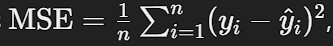
11. Epochs
Definition: An epoch is one complete pass through the entire training dataset.
Explanation: During training, the model learns by processing the data in batches over multiple epochs. Each epoch allows the model to update its weights based on the entire dataset, improving its predictions over time. More epochs can lead to better learning, but too many can result in overfitting.

12. Verbose
Definition: verbose is an argument in Keras that controls the level of detail in the output during training.
Explanation: When training a model, setting verbose=1 displays a progress bar for each epoch, verbose=0 suppresses all output, and verbose=2 displays one line per epoch. This helps in monitoring the training process.

13. Validation Split
Definition: validation_split is a parameter that defines the fraction of the training data to be used as validation data.
Explanation: During training, a portion of the data can be set aside as a validation set to evaluate the model’s performance on unseen data. This helps in preventing overfitting by monitoring how the model performs on data it hasn’t seen during training. For example, validation_split=0.2 means 20% of the training data will be used for validation.

Summary:

Sequential builds a linear stack of layers.

ReLU is an activation function that introduces non-linearity.

Activation function decides if a neuron should be activated.

Dense is a fully connected layer.

Linear is a direct activation without transformation.

Adam is an optimizer for training.

Optimizer updates the model's weights.

Compile configures the model for learning.

Loss measures prediction accuracy.

Mean Squared Error is a common loss for regression.

Epochs are complete training cycles.

Verbose controls training output detail.

Validation Split reserves data to prevent overfitting.

#########################################################################

Validation Loss vs. Training Loss

Training Loss:

Definition: Training loss is the error calculated on the same data that the model is trained on.

Explanation: During the training process, the model makes predictions on the training data and compares these predictions to the actual labels (ground truth). The difference between the predicted values and the actual values is computed using a loss function (like mean squared error for regression tasks). The average of these errors across all training samples in a batch is called the training loss. The model uses this loss to adjust its weights through backpropagation.

Purpose: The training loss indicates how well the model is learning the patterns in the training data. Lower training loss typically indicates that the model is better at making predictions on the training data.

Validation Loss:

Definition: Validation loss is the error calculated on a separate set of data that the model has not been trained on (validation set).

Explanation: After each epoch (or a few epochs), the model is evaluated on the validation data, which it hasn’t seen before. The predictions made by the model on this validation set are compared to the actual labels, and the average error is computed as the validation loss.

Purpose: The validation loss helps monitor the model's performance on unseen data. It's an important metric because it helps detect overfitting. If the validation loss starts increasing while the training loss continues to decrease, it suggests that the model is overfitting, meaning it's learning the noise or details in the training data rather than the underlying patterns.

Key Differences:

Data Used:

Training loss is calculated on the training dataset.
Validation loss is calculated on the validation dataset, which is a subset of the original data not seen during training.

Purpose:

Training loss measures how well the model is learning the training data.
Validation loss measures how well the model generalizes to new, unseen data.

Overfitting Indicator:

If the training loss is low but the validation loss is high, it indicates overfitting, where the model performs well on training data but poorly on new data.

Example in Context:

Suppose you're training a neural network on a dataset of house prices. During training, the model calculates the training loss to understand how well it fits the house prices in the training data. After each epoch, it also calculates the validation loss to see how well it predicts house prices on a separate validation set.

If the training loss decreases steadily but the validation loss starts to increase after some epochs, it suggests that the model is starting to memorize the training data rather than generalize from it. This is a common sign that the model might need regularization, early stopping, or other techniques to improve generalization.